In [67]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings("ignore")

# Voice Gender
Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

# The Dataset
The following acoustic properties of each voice are measured and included within the CSV:

meanfreq: mean frequency (in kHz)

sd: standard deviation of frequency

median: median frequency (in kHz)

Q25: first quantile (in kHz)

Q75: third quantile (in kHz)

IQR: interquantile range (in kHz)

skew: skewness (see note in specprop description)

kurt: kurtosis (see note in specprop description)

sp.ent: spectral entropy

sfm: spectral flatness

mode: mode frequency

centroid: frequency centroid (see specprop)

peakf: peak frequency (frequency with highest energy)

meanfun: average of fundamental frequency measured across acoustic signal

minfun: minimum fundamental frequency measured across acoustic signal

maxfun: maximum fundamental frequency measured across acoustic signal

meandom: average of dominant frequency measured across acoustic signal

mindom: minimum of dominant frequency measured across acoustic signal

maxdom: maximum of dominant frequency measured across acoustic signal

dfrange: range of dominant frequency measured across acoustic signal

modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

label: male or female

In [2]:
#upload the csv file
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


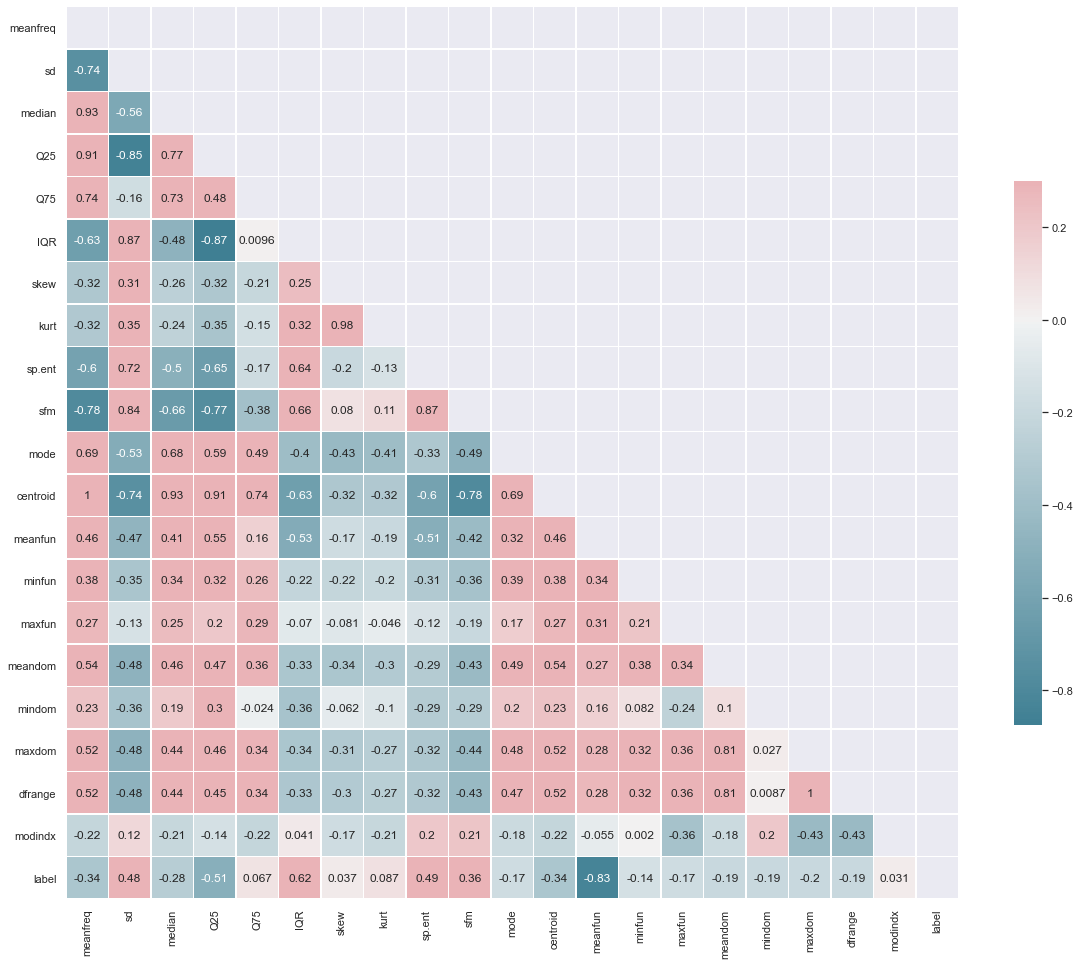

In [41]:
#check correlation between each feature

correlation_matrix = df.corr()

# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="darkgrid")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [4]:
#check for null values
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [6]:
#check shape
df.shape

(3168, 21)

In [7]:
print("Total number of labels: {}".format(df.shape[0]))
print("Number of male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of female: {}".format(df[df.label == 'female'].shape[0]))

Total number of labels: 3168
Number of male: 1584
Number of female: 1584


Thus we can see there are equal number of male and female labels

In [8]:
#Separating features and labels
X=df.iloc[:, :-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [9]:
feature_names = list(X.columns)
feature_names

['meanfreq',
 'sd',
 'median',
 'Q25',
 'Q75',
 'IQR',
 'skew',
 'kurt',
 'sp.ent',
 'sfm',
 'mode',
 'centroid',
 'meanfun',
 'minfun',
 'maxfun',
 'meandom',
 'mindom',
 'maxdom',
 'dfrange',
 'modindx']

In [10]:
# Converting string value to int type for labels

#y=df.iloc[:,-1]

# Encode label category
# male -> 1
# female -> 0

#gender_encoder = LabelEncoder()
#y = gender_encoder.fit_transform(y)
#y

In [11]:
# this will replace "male" with 1.
df['label'].replace(to_replace ="male",
                 value =1, inplace=True)

# this will replace "female" with 0.
df['label'].replace(to_replace ="female",
                 value =0, inplace=True)

In [12]:
y = df['label']

# Data Standardisation
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data.

In [13]:
# Standardise the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)

In [42]:
# Get X and Y train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
#logistic regression
clf_lr=LogisticRegression()
clf_lr.fit(X_train,y_train)
pred=clf_lr.predict(X_test)
print('The accuracy test score:', accuracy_score(pred,y_test))

scores = cross_val_score(clf_lr, X, y, cv=5, scoring='accuracy')
print(scores)
print('The mean cross validation score:', scores.mean())

The accuracy test score: 0.9810725552050473
[0.93217666 0.97476341 0.97318612 0.98104265 0.97156398]
The mean cross validation score: 0.966546563607278


In [44]:
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, pred)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = auc(fpr, tpr)
roc_auc

0.9811967349059336

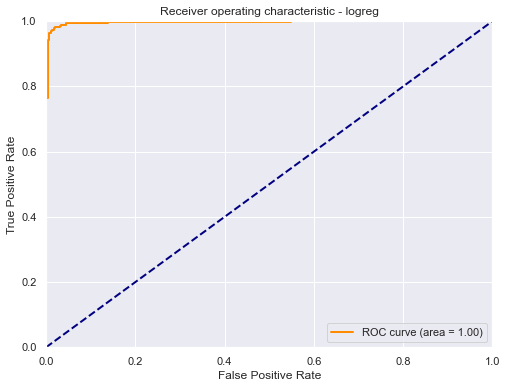

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = clf_lr.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - logreg')
plt.legend(loc = "lower right")
plt.show()

In [45]:
#SVM
clf_svm=SVC()
clf_svm.fit(X_train,y_train)
pred=clf_svm.predict(X_test)
print('The accuracy test score:', accuracy_score(pred,y_test))

scores = cross_val_score(clf_svm, X, y, cv=5, scoring='accuracy')
print(scores)
print('The mean cross validation score:', scores.mean())

The accuracy test score: 0.9826498422712934
[0.94006309 0.97003155 0.98107256 0.98894155 0.95734597]
The mean cross validation score: 0.9674909424352516


In [46]:
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, pred)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = auc(fpr, tpr)
roc_auc

0.9828802365894354

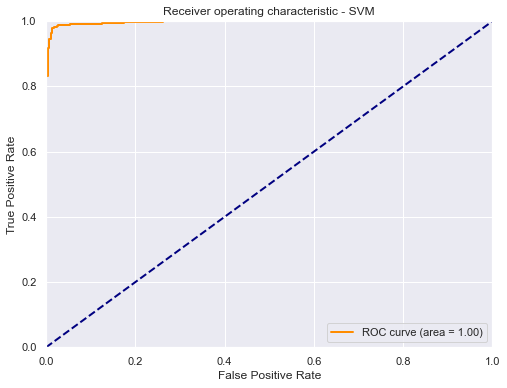

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Generate the prediction values for each of the test observations using decision_function() function rather than just predict
preds = clf_svm.decision_function(X_test)

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - SVM')
plt.legend(loc = "lower right")
plt.show()

In [47]:
#kNN
clf_knn=KNeighborsClassifier()
clf_knn.fit(X_train,y_train)
pred=clf_knn.predict(X_test)
print('The accuracy test score:', accuracy_score(pred,y_test))

scores = cross_val_score(clf_knn, X, y, cv=5, scoring='accuracy')
print(scores)
print('The mean cross validation score:', scores.mean())


The accuracy test score: 0.9810725552050473
[0.9148265  0.9384858  0.97003155 0.97314376 0.92575039]
The mean cross validation score: 0.9444476006797535


In [48]:
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, pred)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = auc(fpr, tpr)
roc_auc

0.9809969127476545

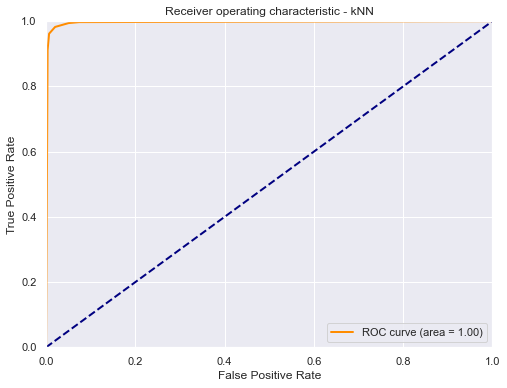

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = clf_knn.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - kNN')
plt.legend(loc = "lower right")
plt.show()

Seems like SVM is producing the best test accuracy score of 0.9826 as well as the best CV score of 0.96749. Lets do a further comparison of all the modelling algorithms.

In [21]:
# We can now move onto comparing the results of various modelling algorithms. 
# for this I shall combine the results of all models in a data frame and then plot using a lineplot .

models=[LogisticRegression(),SVC(),SVC(kernel='rbf'),SVC(kernel='poly'),KNeighborsClassifier()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','polySVM','KNearestNeighbors']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}

In [22]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.981073
1,LinearSVM,0.982650
2,rbfSVM,0.982650
3,polySVM,0.968454
4,KNearestNeighbors,0.981073


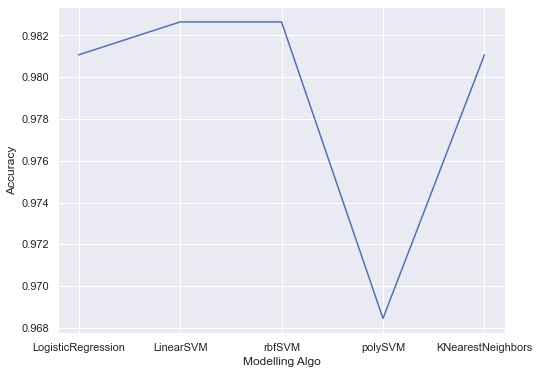

In [23]:
#a line plot to show the difference in the accuracy between the models
plt.figure(figsize=(8,6))
sns.lineplot(x='Modelling Algo',y='Accuracy',data=acc_frame,markers=True)
plt.show()

In [50]:
# We can now move onto comparing the results of various modelling algorithms. 
# for this I shall combine the results of all models in a data frame and then plot using a lineplot .

models=[LogisticRegression(),SVC(),SVC(kernel='rbf'),SVC(kernel='poly'),KNeighborsClassifier()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','polySVM','KNearestNeighbors']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    acc.append(roc_auc)
     
d={'Modelling Algo':model_names,'ROC_AUC':acc}

acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,ROC_AUC
0,LogisticRegression,0.981197
1,LinearSVM,0.982880
2,rbfSVM,0.982880
3,polySVM,0.967329
4,KNearestNeighbors,0.980997


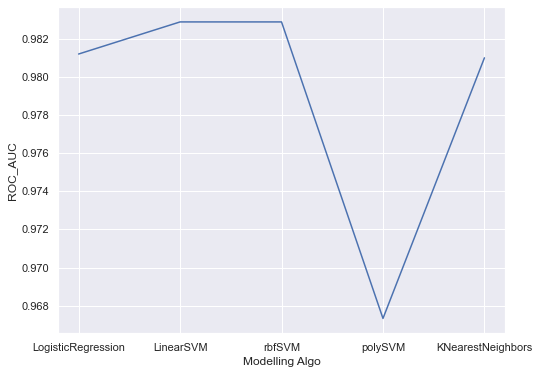

In [51]:
#a line plot to show the difference in the accuracy between the models
plt.figure(figsize=(8,6))
sns.lineplot(x='Modelling Algo',y='ROC_AUC',data=acc_frame,markers=True)
plt.show()

From the visualisation above, we can see that linearSVM and rbfSVM seem to produce the best test accuracy of 0.982650. We shall now refine the parameters for all the modelling algorithm's to see if we can get a better model. 

In [24]:
# Parameter Tuning with GridSearchCV
# I have narrowed down and tuned for SVM

# i have also computed the runtime for the search
import time

# starting time
start = time.time()

#gridsearchcv - SVM
params_dict_SVM={'C':[0.001,0.01,0.1,1,10,100],
                 'gamma':[0.001,0.01,0.1,1,10,100],
                 'degree':[3,4,5],
                 'kernel':['linear', 'poly', 'rbf']}
clf_GridSearchCV_SVM=GridSearchCV(estimator=SVC(),param_grid=params_dict_SVM,scoring='accuracy',cv=5)
print(clf_GridSearchCV_SVM.fit(X_train,y_train))

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [3, 4, 5],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')
Runtime of the program is 206.51041340827942


In [25]:
# gridsearchcv results for SVM
# The grid.best_score_ is the average of all cv folds for a single combination of the parameters you specify in the tuned_params.

print('Best parameters:', clf_GridSearchCV_SVM.best_params_)
print('Best training score:', clf_GridSearchCV_SVM.best_score_)
print('Accuracy test score:',accuracy_score(clf_GridSearchCV_SVM.predict(X_test),y_test))
print('Precision score:', precision_score(clf_GridSearchCV_SVM.predict(X_test),y_test))

# print classification report
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = clf_GridSearchCV_SVM.predict(X_test) 
print(classification_report(y_test, grid_predictions))

Best parameters: {'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}
Best training score: 0.9814548884782999
Accuracy test score: 0.9842271293375394
Precision score: 0.9792284866468842
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       297
           1       0.99      0.98      0.99       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [26]:
# starting time
start = time.time()
#obtain the accuracy score using crossvalidation
final_clf_svm = SVC(C= 10, degree= 3, gamma= 0.1, kernel= 'rbf')
cvscores_svm = cross_val_score(final_clf_svm, X, y, cv=5, scoring='accuracy')
print(cvscores_svm)
print('The mean cross validation score:', cvscores_svm.mean())
# end time
end = time.time()
# total time taken
print(f"Runtime of the program is {end - start}")

[0.91640379 0.95425868 0.98107256 0.97946288 0.92733017]
The mean cross validation score: 0.951705612949203
Runtime of the program is 0.2050464153289795


Text(21.5, 0.5, 'Predicted label')

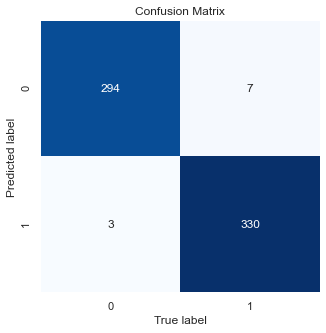

In [64]:
# plot
fig, ax = plt.subplots(1, 1, figsize = (5, 5))

#confusion matrix
y_pred_class = clf_GridSearchCV_SVM.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cf_matrix.T, cmap = 'Blues',annot=True,fmt = 'd', cbar = False)
ax.set_title('Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')


In [80]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'GnBu', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'black', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

Accuracy : 0.9842 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9910 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9792 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9846                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


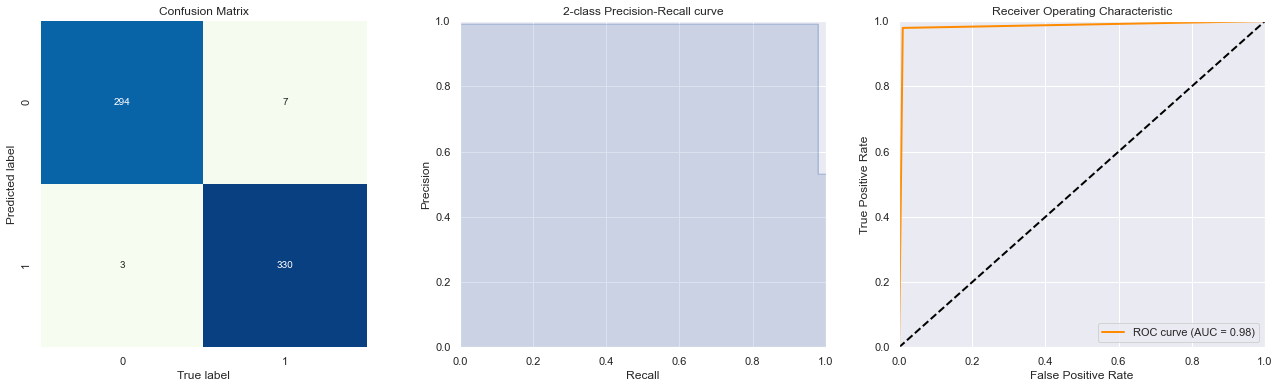

(0.9842271293375394, 0.990990990990991, 0.9792284866468842, 0.9845637382729371)

In [81]:
#SVM
show_summary_report(y_test, y_pred_class)

In [28]:
import time

# starting time
start = time.time()

#prameter tuning for kNN
params_dict_knn= {"n_neighbors": range(1, 30), 
                  "weights": ['uniform', 'distance'], 
                  "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}

clf_GridSearchCV_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict_knn,scoring='accuracy',cv=5)
print(clf_GridSearchCV_knn.fit(X_train,y_train))

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')
Runtime of the program is 41.48104953765869


In [29]:
# gridsearchcv results for knn

print('Best parameters:', clf_GridSearchCV_knn.best_params_)
print('Best training score:', clf_GridSearchCV_knn.best_score_)
print('Accuracy test score:',accuracy_score(clf_GridSearchCV_knn.predict(X_test),y_test))
print('Precision score:', precision_score(clf_GridSearchCV_knn.predict(X_test),y_test))
   
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = clf_GridSearchCV_knn.predict(X_test) 
print(classification_report(y_test, grid_predictions))

Best parameters: {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}
Best training score: 0.9763259037506529
Accuracy test score: 0.9810725552050473
Precision score: 0.9821958456973294
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       297
           1       0.98      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [30]:
# starting time
start = time.time()
#obtain the accuracy score using crossvalidation
final_clf_knn = KNeighborsClassifier(algorithm='auto',n_neighbors=4,weights='distance')
cvscores_knn = cross_val_score(final_clf_knn, X, y, cv=5, scoring='accuracy')
print(cvscores_knn)
print('The mean cross validation score:', cvscores_knn.mean())
# end time
end = time.time()
# total time taken
print(f"Runtime of the program is {end - start}")

[0.91955836 0.94006309 0.97634069 0.98104265 0.92417062]
The mean cross validation score: 0.9482350830505182
Runtime of the program is 0.20004534721374512


Text(21.5, 0.5, 'Predicted label')

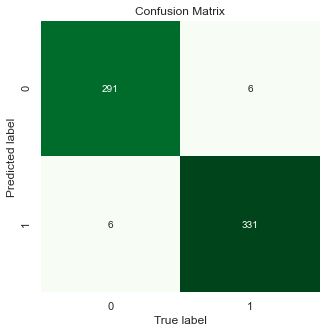

In [86]:
# plot
fig, ax = plt.subplots(1, 1, figsize = (5, 5))

#confusion matrix
y_pred_class = clf_GridSearchCV_knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cf_matrix.T, cmap = 'Greens',annot=True,fmt = 'd', cbar = False)
ax.set_title('Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

Accuracy : 0.9811 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9822 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9822 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9810                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


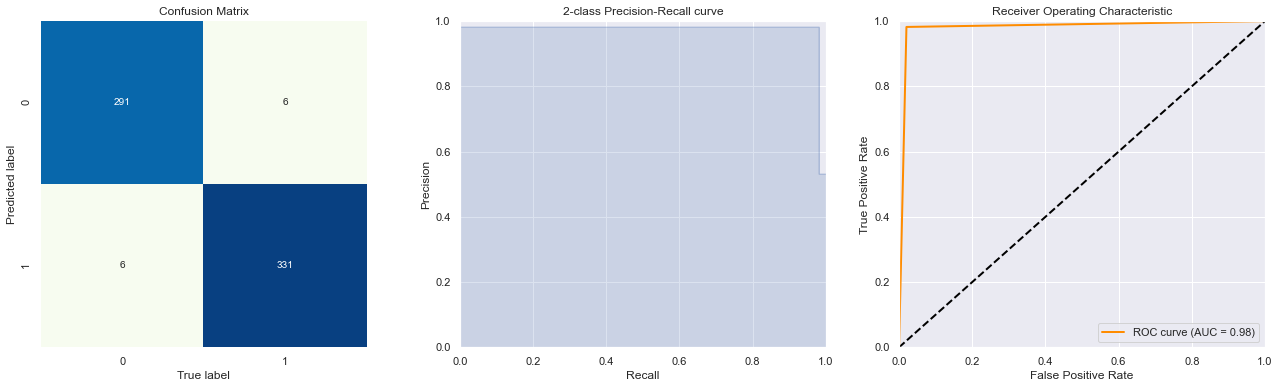

(0.9810725552050473,
 0.9821958456973294,
 0.9821958456973294,
 0.9809969127476545)

In [83]:
#kNN
show_summary_report(y_test, y_pred_class)

In [32]:
#prameter tuning for logreg

import time

# starting time
start = time.time()


params_dict_lr = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga']
    }
]
    
clf_GridSearchCV_lr = GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict_lr,scoring='accuracy',cv=5)
clf_GridSearchCV_lr.fit(X_train,y_train)

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

Runtime of the program is 29.851824522018433


In [33]:
# gridsearchcv results for logreg

print('Best parameters:', clf_GridSearchCV_lr.best_params_)
print('Accuracy score:', clf_GridSearchCV_lr.best_score_)
print('Accuracy test score:',accuracy_score(clf_GridSearchCV_lr.predict(X_test),y_test))
print('Precision score:', precision_score(clf_GridSearchCV_lr.predict(X_test),y_test))

# print classification report
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = clf_GridSearchCV_lr.predict(X_test)
print(classification_report(y_test, grid_predictions))

Best parameters: {'C': 4.281332398719396, 'penalty': 'l1', 'solver': 'saga'}
Accuracy score: 0.9727740486937811
Accuracy test score: 0.9794952681388013
Precision score: 0.9762611275964391
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       297
           1       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [37]:
# starting time
start = time.time()
#obtain the accuracy score using crossvalidation
final_clf_lr = LogisticRegression(C=4.281332398719396,penalty='l1',solver='saga')
cvscores_lr = cross_val_score(final_clf_lr, X, y, cv=5, scoring='accuracy')
print(cvscores_lr)
print('The mean cross validation score:', cvscores_lr.mean())
# end time
end = time.time()
# total time taken
print(f"Runtime of the program is {end - start}")

[0.92902208 0.97476341 0.97318612 0.98104265 0.97156398]
The mean cross validation score: 0.9659156487807795
Runtime of the program is 0.39508962631225586


Text(21.5, 0.5, 'Predicted label')

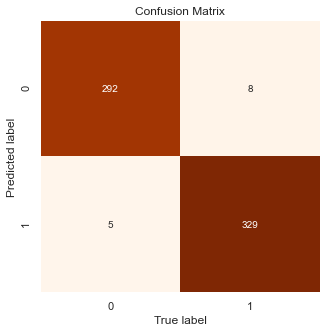

In [87]:
# plot
fig, ax = plt.subplots(1, 1, figsize = (5, 5))

#confusion matrix
y_pred_class = clf_GridSearchCV_lr.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cf_matrix.T, cmap = 'Oranges',annot=True,fmt = 'd', cbar = False)
ax.set_title('Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

Accuracy : 0.9795 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9850 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9763 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9797                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


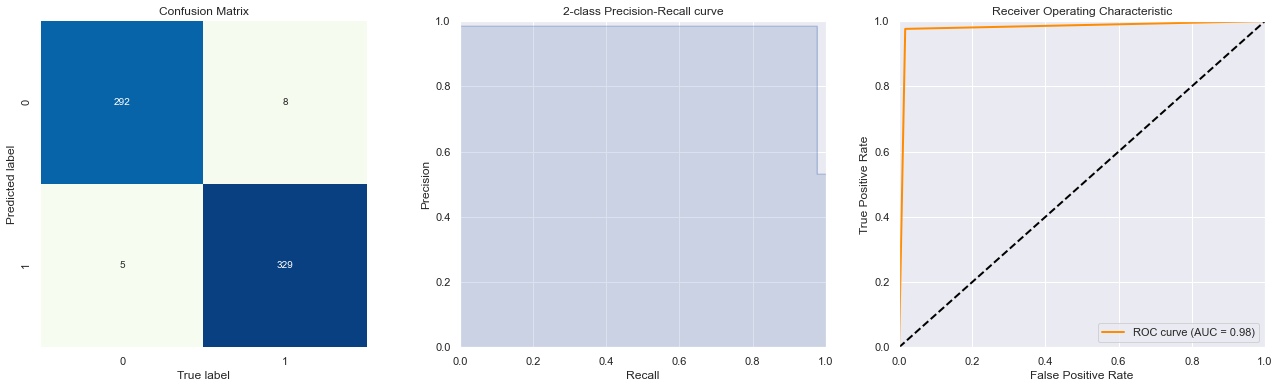

(0.9794952681388013,
 0.9850299401197605,
 0.9762611275964391,
 0.9797130553807112)

In [85]:
#lr
show_summary_report(y_test, y_pred_class)